# ARIMA

In [1]:
import wandb
import os

import numpy as np
import matplotlib.pyplot as plt

from dataset.data_loaders import dataset_for_benchmark
from inference.frequentist.utils import plot_forecast
from inference.inference import inference

In [2]:
config = {
            "dataset": "acea",
            "inference": "arima",
            "start_p": 1,
            "start_q": 1,
            "max_p": 4,
            "max_q": 4,
            "m": 1,
            "start_P": 0,
            "d": 1,
            "D": 1,
            "plot": False
            }

os.environ["WANDB_MODE"]="offline"
wandb.init(project="bayes_rc", config=config)
config = wandb.config

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [3]:
device = 'cpu'

Xtr, Ytr, Xval, Yval, Xte, Yte, diffXte, diffYte, horizon = dataset_for_benchmark(config.dataset, device)

In [4]:
# Quantiles
quantiles = [0, 0.005]
for n in range(39):
    quantiles.append(0.025*(n+1))
quantiles.append(0.995)

In [5]:
predictive, diagnostics = inference(config, None, None,
                                    X_train=Xtr, Y_train=Ytr, 
                                    X_val=Xval, Y_val=Yval,
                                    X_test=Xte, Y_test=Yte,
                                    quantiles=quantiles,
                                    horizon=horizon)

Best model selected:   ARIMA(4,1,3)(0,0,0)[0]          


CI 0.05: 100%|██████████| 10428/10428 [00:14<00:00, 742.46it/s]


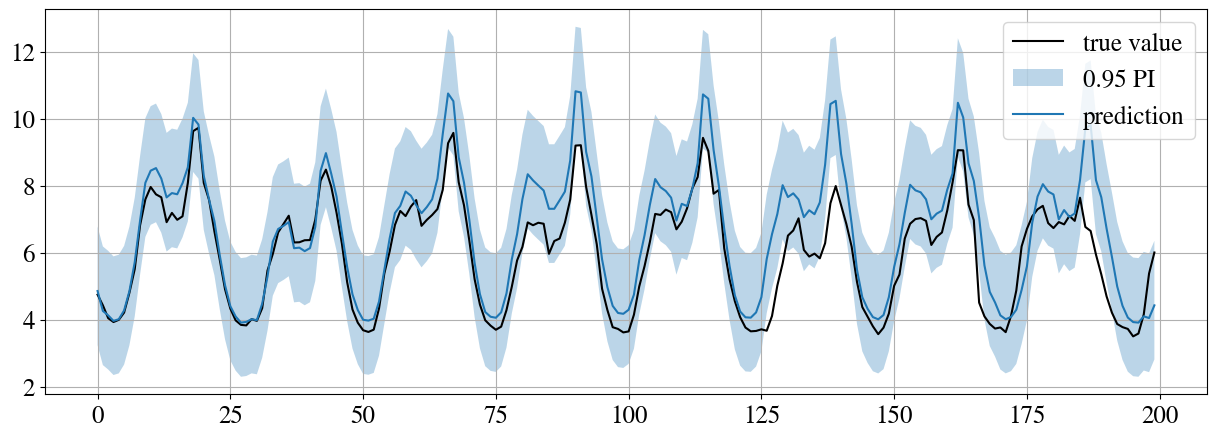

In [6]:
plot_forecast(predictive, Yte, diffXte.squeeze(), diffYte.squeeze(), name="arima", n=1, length=200)

In [7]:
predictive[0,]

tensor([-1.8352, -1.5256, -1.3238, -1.1686, -1.0397, -0.9277, -0.8277, -0.7363,
        -0.6516, -0.5721, -0.4967, -0.4246, -0.3552, -0.2880, -0.2225, -0.1583,
        -0.0952, -0.0328,  0.0290,  0.0783,  0.0906,  0.1029,  0.1522,  0.2141,
         0.2765,  0.3396,  0.4037,  0.4692,  0.5365,  0.6059,  0.6780,  0.7534,
         0.8329,  0.9176,  1.0089,  1.1090,  1.2209,  1.3498,  1.5051,  1.7068,
         2.0164], dtype=torch.float64)

In [7]:
for k, v in diagnostics.items():
    print(k, "\t", v)

train_time 	 219.046875
final_loss 	 nan
inference_time 	 84.75
cal_error 	 0.355784247766738
new_cal_error 	 0.020173034477268943
quantiles 	 [0.005, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225, 0.25, 0.275, 0.30000000000000004, 0.325, 0.35000000000000003, 0.375, 0.4, 0.42500000000000004, 0.45, 0.47500000000000003, 0.5, 0.525, 0.55, 0.5750000000000001, 0.6000000000000001, 0.625, 0.65, 0.675, 0.7000000000000001, 0.7250000000000001, 0.75, 0.775, 0.8, 0.8250000000000001, 0.8500000000000001, 0.875, 0.9, 0.925, 0.9500000000000001, 0.9750000000000001, 0.995]
new_quantiles 	 [0.0243575  0.03471423 0.04890679 0.06041427 0.06962025 0.08151132
 0.0972382  0.11143076 0.12984273 0.15209053 0.17088608 0.1969697
 0.22823168 0.26179517 0.30341389 0.34618335 0.39969313 0.46087457
 0.52608362 0.57249712 0.58611431 0.59608746 0.63598005 0.68200997
 0.71825853 0.75297277 0.78174147 0.80686613 0.831799   0.85308784
 0.86843115 0.88511699 0.90141926 0